In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pyuff

In [64]:
uff_file = pyuff.UFF('measurement.uff')
data = uff_file.read_sets()

freq = data[0]['x']
Omega = 2*np.pi*freq
data[0]['data'][0] = np.nan*(1+1.j)
H1 = (data[0]['data'])
H2 = (data[1]['data'])
H3 = data[2]['data']

In [65]:
def FRF_Modal (Omega, Aij, loss, eigfreq):
    H = np.zeros((3,len(Omega)),dtype=complex)
    h = np.zeros((Aij.shape[1],len(Omega)),dtype=complex)
    Phase = np.zeros((3,len(Omega)))

    for ii in range(Aij.shape[0]):
        for jj in range(Aij.shape[1]):  
            h[jj]=Aij[ii][jj]/(eigfreq[jj]**2-Omega**2 +1j*loss[jj]*eigfreq[jj]**2)        
        H[ii] = np.sum(h,0)
    return(H)

In [66]:
def Modal2FRF (f,p,V,indof,outdof):
    jw=1j*2*np.pi*f
    N=len(f);
    D=len(outdof)
    R=len(indof)
    Nm=len(p)
    H=np.zeros((D,R,N),dtype = complex)
    # Loop through all inputs
    for inno in range(R):
    # Loop through response dofs
        for outno in range(D):
        # Loop through modes
            for mode in range(Nm):
                # Calculate residue. NOTE!  Modes scaled to unity modal A
                A=V[indof[inno]][mode]*V[outdof[outno]][mode]
                # Compute dynamic flexibility
                H[outno][inno]=H[outno][inno]+A/(jw-p[mode])+np.conjugate(A)/(jw-np.conjugate(p[mode]))
    return(H)

In [67]:
eigfreq_OpenModal_LSCF = 2*np.pi*np.array([51.5077448498, 142.177242436, 278.662408546,
                                           460.397094774, 687.163555473, 958.617759675])
loss_OpenModal_LSCF = np.array([0.000196302080148, 0.000361929656105, 0.000185512449023,
                                0.000192946257608, 0.000166236477257, 0.000187948035809])
Aij_OpenModal_LSCF = np.array([[4.92730339156-25.126744019j,0.035334593008+52.2860194453j,2.04731045897-85.9293631554j,
                                -5.92716983281+112.296843122j,-5.75950967472-128.348926742j,-15.9403402418+125.177077928j],
                              [3.54236648222-18.4398344982j,1.19186606779+24.3235885842j,0.60797999181-20.8149352842j,
                               0.419668606313-8.49663961643j,1.33547043566+50.5203815268j,15.9259323931-106.080355795j],
                              [2.21710451754-11.6561867093j,-0.0245304901823+2.12097401775j,-1.17758685391+33.929667712j,
                               5.3295076887-91.5654178374j,-8.46215731335+144.332002035j,27.2723982792-166.909585939j]])

eigfreq_Easymod_LineFit = 2*np.pi*np.array([ 51.500511, 142.13699, 278.63579, 460.39089, 687.16864, 958.49457])
loss_Easymod_LineFit = np.array([ 0.0013030, 0.0006586, 0.0003190, 0.0003851, 0.0002131, 0.0003118])
Aij_Easymod_LineFit = np.array([[- 16824.088 + 3108.3879j,92588.828 + 1973.0015j,- 299676.68 + 12168.253j,
                                652193.1 - 13807.749,- 1101430.8 + 10113.376j,1568744.7 - 15432.364j],
                                [- 12288.243 + 2435.1838j,44107.239 + 975.77657j,- 69644.317 + 1688.3992j,
                                 - 50596.448 + 1741.5869j, 487061.27 - 9024.7682j,- 1344250.8 + 29178.794j],
                                [- 7486.9699 + 1138.5698j, 3690.678 + 98.570601j,120581.6 - 1196.3587j,
                                 - 529532.14 + 8570.5775j, 1270116.2 - 45791.172,- 2224407.1 + 42905.213j]])

p = np.array([-0.121986940799366+323.528288575809j,-0.315590656661234+893.261709205390j,-0.333116057618104+1750.83146889976j,
              -0.573030994972034+2892.68010408882j,-0.670715878729641+4317.56824225483j,-0.810335658946863+6022.55914140182j])

V = np.array([[3.90640632857305+3.21427553964178,5.07814556611895-4.95093775624214j,6.3423317111419+6.53844408715562j,
               7.26161060049094-7.59880053301809j,7.87338020079082+8.03283364856164j,7.92274147966457-8.19232255070652j],
              [2.86104926066291+2.36287625835083j,2.44071320194547-2.19647364039208j,1.63414939604750+1.57025724242814j,
               -0.555460341212146+0.574405075200316j,-3.14066119894615-3.09007446962297j,-6.60523545496388+7.14631095026045j],
              [1.80694442729888+1.49114827102723j,0.197100594778634-0.203591218952617j,-2.68114706807079-2.55092561133060j,
               -5.91305661338658+6.24518195768928j,-9.70320713664449-8.03869650919867j,-10.2168901959861+11.5637179379743j]])

In [68]:
#H_OpenModal_LSCE = FRF_Modal_Receptance(Omega,Aij_OpenModal_LSCE,loss_OpenModal_LSCE,eigfreq_OpenModal_LSCE)
H_OpenModal_LSCF = FRF_Modal(Omega,Aij_OpenModal_LSCF,loss_OpenModal_LSCF,eigfreq_OpenModal_LSCF)
H_EasyMod_LineFit = FRF_Modal(Omega,Aij_Easymod_LineFit,loss_Easymod_LineFit,eigfreq_Easymod_LineFit)
H_AbraVib = Modal2FRF(freq,p,V,[0],[0,1,2])

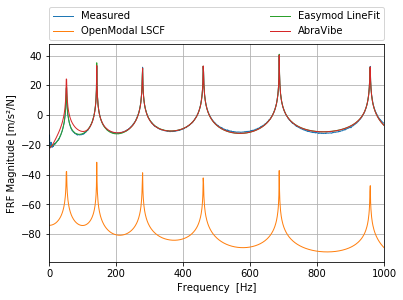

In [69]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(freq, 20*np.log10(np.abs(H1)),label='Measured',linewidth = 1)
#ax.plot(freq, 20*np.log10(np.abs(H_OpenModal_LSCE[0])),label='OpenModal LSCE',linewidth = 1)
ax.plot(freq, 20*np.log10(np.abs(H_OpenModal_LSCF[0])),label='OpenModal LSCF',linewidth = 1)
ax.plot(freq, 20*np.log10(np.abs(H_EasyMod_LineFit[0])),label='Easymod LineFit',linewidth = 1)
ax.plot(freq, 20*np.log10(np.abs(H_AbraVib[0][0])),label='AbraVibe',linewidth = 1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Frequency  [Hz]')
plt.ylabel('FRF Magnitude [m/s²/N]')
plt.xlim([0,1000])
plt.grid(True)
plt.show()
#fig.savefig('H11.png',bbox_inches='tight',dpi=1000)

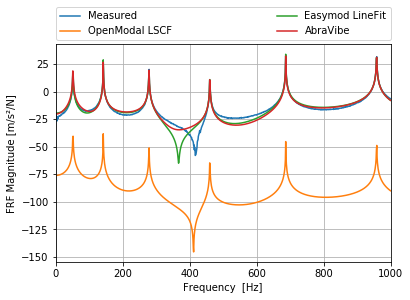

In [70]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(freq, 20*np.log10(np.abs(H2)),label='Measured')
#ax.plot(freq, 20*np.log10(np.abs(H_OpenModal_LSCE[1])),label='OpenModal LSCE')
ax.plot(freq, 20*np.log10(np.abs(H_OpenModal_LSCF[1])),label='OpenModal LSCF')
ax.plot(freq, 20*np.log10(np.abs(H_EasyMod_LineFit[1])),label='Easymod LineFit')
ax.plot(freq, 20*np.log10(np.abs(H_AbraVib[1][0])),label='AbraVibe')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Frequency  [Hz]')
plt.ylabel('FRF Magnitude [m/s²/N]')
plt.xlim([0,1000])
plt.grid(True)
plt.show()
#fig.savefig('H21.png',bbox_inches='tight',dpi=1000)

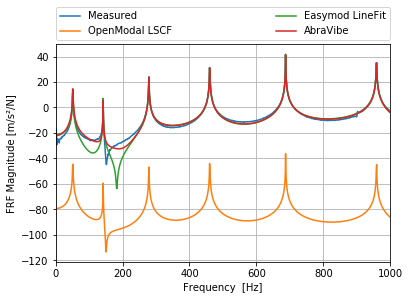

In [71]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(freq, 20*np.log10(np.abs(H3)),label='Measured')
#ax.plot(freq, 20*np.log10(np.abs(H_OpenModal_LSCE[2])),label='OpenModal LSCE')
ax.plot(freq, 20*np.log10(np.abs(H_OpenModal_LSCF[2])),label='OpenModal LSCF')
ax.plot(freq, 20*np.log10(np.abs(H_EasyMod_LineFit[2])),label='Easymod LineFit')
ax.plot(freq, 20*np.log10(np.abs(H_AbraVib[2][0])),label='AbraVibe')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Frequency  [Hz]')
plt.ylabel('FRF Magnitude [m/s²/N]')
plt.xlim([0,1000])
plt.grid(True)
plt.show()
#fig.savefig('H31.png',bbox_inches='tight',dpi=1000)